In [23]:
import matplotlib.pyplot as plt
from MCEq.particlemanager import MCEqParticle, ParticleManager
from MCEq.data import InteractionCrossSections, HDF5Backend
from MCEq.core import MCEqRun
import crflux.models as pm
import mceq_config as config
import numpy as np

In [24]:
mceq_run = MCEqRun(
#provide the string of the interaction model
interaction_model="QGSJETII04",
#primary cosmic ray flux model
primary_model = (pm.HillasGaisser2012, "H3a"),
# Zenith angle in degrees. 0=vertical, 90=horizontal
theta_deg=0.0
)

MCEqRun::set_interaction_model(): QGSJETII04
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a


In [25]:
hdf5_backend = HDF5Backend()
interaction_cs = InteractionCrossSections(hdf5_backend, "DPMJETIII191")

In [48]:
pid_size = 0
for p in mceq_run.pman.all_particles:
    if p.is_hadron:
        pid_size += 1
        
energy_grid = np.geomspace(1e0, 1e11, 1000, dtype='float64')
sigma_tab = np.empty([pid_size, len(energy_grid)], dtype=np.float64)

In [49]:
pid = 0
pid_from_pdg = dict()  
for p in mceq_run.pman.all_particles:
    if p.is_hadron:
        pdg = p.pdg_id[0]
        sigma_tab[pid, :] = np.interp(energy_grid, 
                                      interaction_cs.energy_grid.c + p.mass, 
                                      interaction_cs.get_cs(p.pdg_id[0], True))
        
        pid_from_pdg[pdg] = pid
        pid += 1

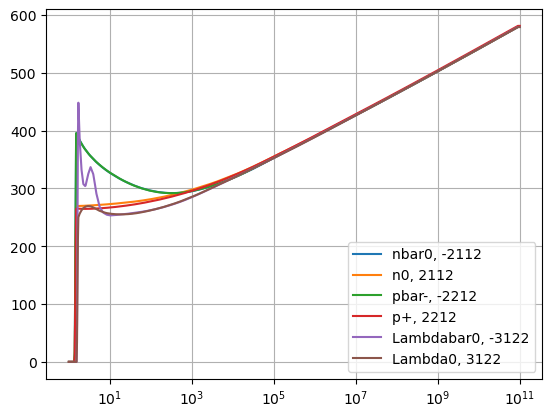

In [50]:
for p in mceq_run.pman.all_particles:
    # if p.is_hadron and abs(p.pdg_id[0]) in [321, 310, 130, 2212, 111]:
    # if p.is_hadron:
    if p.is_hadron and abs(p.pdg_id[0]) in [2212, 2112, 3122]:
        plt.semilogx(energy_grid, sigma_tab[pid_from_pdg[p.pdg_id[0]], :], label=f"{p.name}, {p.pdg_id[0]}")
        
plt.grid()
plt.legend()  